<a href="https://colab.research.google.com/github/pascal-maker/machinelearning/blob/main/Demo_Logistic_regression_apples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns

In [2]:
dataset = pd.read_csv('apples.csv')

dataset.head()

,roundness,greenness,apple
0,9,8,1
1,10,7,1
2,2,3,0
3,1,2,0
4,5,8,1


In [3]:
# Split features and targets

features = list(dataset.columns[:dataset.columns.size-1])
X = dataset[features].values
y= dataset['apple'].values

features: Alle kolommen behalve de laatste worden gebruikt als invoer (features).

X: Een numpy-array met alle feature-waarden.

y: De doelvariabele (target), die aangeeft of een fruit een appel (1) of geen appel (0) is.

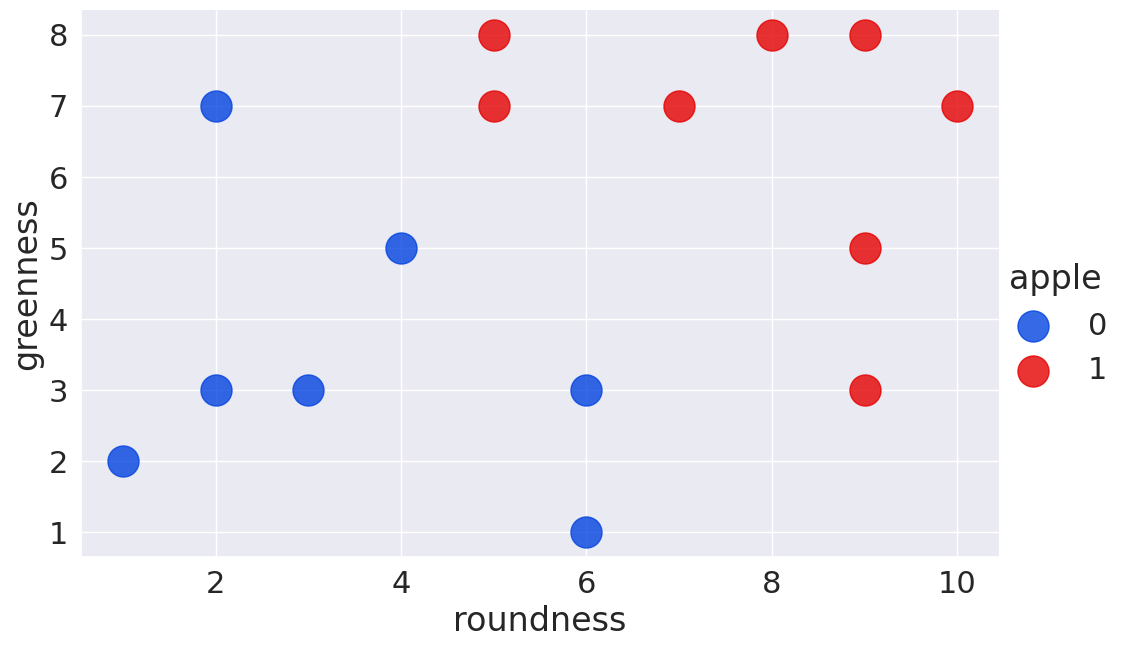

In [4]:
# Scatterplot

sns.set(font_scale = 2)
colors = ["blue", "red", "greyish", "faded green", "dusty purple"]
sns.lmplot(x='roundness',y='greenness',data=dataset,fit_reg=False,hue='apple',palette =sns.xkcd_palette(colors),
           scatter_kws={'s':500}, height=7, aspect=1.5)
#sns.plt.ylim(0, 11)
#sns.plt.xlim(0, 11)

sns.set(font_scale=2): Vergroot de lettergrootte voor betere leesbaarheid.

sns.lmplot: Maakt een scatterplot van roundness (x-as) en greenness (y-as) met kleurcodering op basis van de apple-klasse.

fit_reg=False: Geen lineaire regressielijn toevoegen.

hue='apple': Kleurcodeert de punten op basis van de apple-klasse.

scatter_kws={'s':500}: Past de grootte van de punten aan

In [5]:
# Train logistic regression classifier

logreg = linear_model.LogisticRegression(C=1e5, solver='lbfgs') # C= Inverse of regularization strength;
                                                # must be a positive float. Like in support vector machines,
                                                # smaller values specify stronger regularization.
logreg.fit(X, y)

print('coefficients: ',logreg.coef_)
print('intercept:',logreg.intercept_)

coefficients:  [[5.29416066 5.00200625]]
intercept: [-54.18842193]


C=1e5: Weinig regularisatie (zeer sterke fit).

solver='lbfgs': Gebruikt de lbfgs-algoritme voor optimalisatie, goed voor kleinere datasets.

logreg.fit(X, y): Past het model aan de trainingsdata (X, y). Print de coëfficiënten (weights) van de features en de intercept van het getrainde model.

In [6]:
#predict roundness=8 and greenness = 6

print(logreg.predict(np.array([8,6]).reshape(1,-1)))

print('probability apple/ not an apple',logreg.predict_proba(np.array([8,6]).reshape(1,-1)))

#predict roundness=4 and greenness = 4

print(logreg.predict(np.array([4,4]).reshape(1,-1)))
print('probability apple/ not an apple',logreg.predict_proba(np.array([4,4]).reshape(1,-1)))

[1]
probability apple/ not an apple [[1.27606340e-08 9.99999987e-01]]
[0]
probability apple/ not an apple [[9.99997748e-01 2.25185433e-06]]


Voorspelt of een object met roundness=8 en greenness=6 een appel is.

Print de waarschijnlijke klassen (0 of 1).

Print de kansverdeling ([P(not apple), P(apple)]).

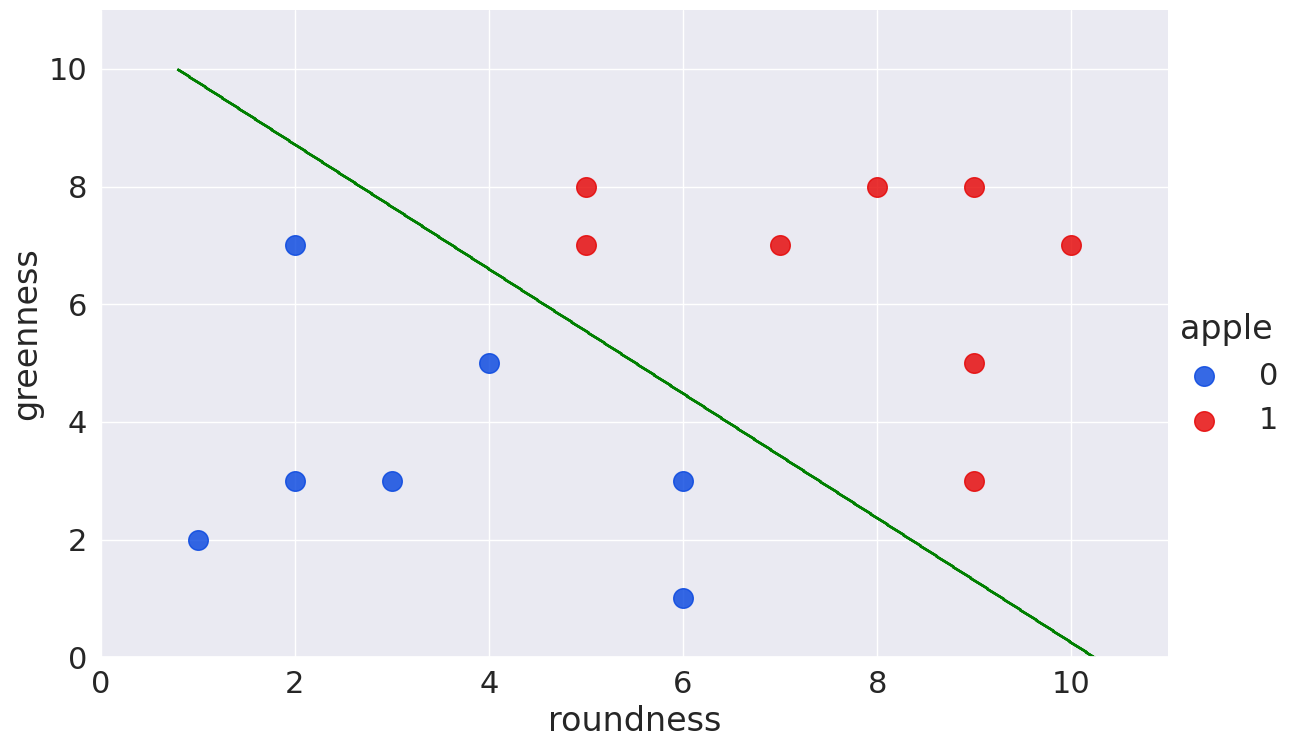

In [7]:
# decision boundary

h = 0.01
rond_min = X[:,0].min()-2
rond_max = X[:,0].max()+2
groen_min = X[:,1].min()-2
groen_max = X[:,1].max()+2
xx, yy = np.meshgrid(np.arange(rond_min, rond_max, h),np.arange(groen_min, groen_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
sns.set(font_scale = 2)
colors = ["blue", "red", "greyish", "faded green", "dusty purple"]
sns.lmplot(x='roundness',y='greenness',data=dataset,fit_reg=False,hue='apple',palette =sns.xkcd_palette(colors),scatter_kws={'s':200}, height=8, aspect=1.5)
plt.ylim(0, 11)
plt.xlim(0, 11)
plt.contour(xx, yy, Z, colors='green')

### non-linearly seperable data

### **Uitleg voor Beginners - Decision Boundary Plotten voor een Classifier**

---

Dit stukje code maakt een **beslissingsgrens** (**decision boundary**) voor een **Logistic Regression** model. Dit helpt je te **visualiseren** hoe je model **beslissingen** maakt op basis van **twee** kenmerken (bijvoorbeeld **rondheid** en **groenheid** van appels). Laten we dit stap voor stap uitleggen.

---

#### **1. Definiëren van de Grenzen van de Grafiek**

```python
h = 0.01
rond_min = X[:,0].min() - 2
rond_max = X[:,0].max() + 2
groen_min = X[:,1].min() - 2
groen_max = X[:,1].max() + 2
```

* **Wat het doet:** Bepaalt de **minimale** en **maximale** waarden voor de **x-** en **y-as**.
* **Waarom:** Je wil dat de beslissingsgrens **buiten** de grenzen van je data valt voor een nettere grafiek.
* **h = 0.01:** De **stapgrootte** voor je rooster (**fijnere** grid voor een **gladdere** grens).

---

#### **2. Maken van een Rooster (Grid)**

```python
xx, yy = np.meshgrid(np.arange(rond_min, rond_max, h), np.arange(groen_min, groen_max, h))
```

* **Wat het doet:** Maakt een **grid** (rooster) van **x-** en **y-waarden** over het bereik dat je net hebt gedefinieerd.
* **Waarom:** Je wil voorspellingen maken op elk punt in dit rooster om te zien waar de beslissingsgrens ligt.

---

#### **3. Voorspellen van Klassen voor Elk Punt in de Grid**

```python
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
```

* **Wat het doet:**

  * **np.c\_** combineert de x- en y-waarden tot een lange lijst van coördinaten.
  * **logreg.predict()** gebruikt je getrainde **Logistic Regression** model om **0** of **1** te voorspellen voor elk punt in de grid.
* **Waarom:** Dit laat je zien welk **gebied** van de grafiek tot welke klasse behoort.

---

#### **4. De Vorm van de Grid Herstellen**

```python
Z = Z.reshape(xx.shape)
```

* **Wat het doet:** Zet de voorspellingen terug in de originele **vorm** van het grid.
* **Waarom:** Je hebt nu een 2D-array die je kunt **plotten** als een contour (beslissingsgrens).

---

#### **5. Plotten van de Data**

```python
sns.set(font_scale = 2)
colors = ["blue", "red", "greyish", "faded green", "dusty purple"]
sns.lmplot(x='roundness', y='greenness', data=dataset, fit_reg=False, hue='apple', palette=sns.xkcd_palette(colors), scatter_kws={'s':200}, height=8, aspect=1.5)
```

* **Wat het doet:** Maakt een **scatterplot** van je **rondheid** en **groenheid** data.
* **Belangrijk:**

  * **hue='apple'** zorgt dat je verschillende klassen in verschillende **kleuren** ziet.
  * **fit\_reg=False** betekent **geen** regressielijn, omdat je alleen de punten wil zien.

---

#### **6. Instellen van de Grenzen van de Plot**

```python
plt.ylim(0, 11)
plt.xlim(0, 11)
```

* **Wat het doet:** Zet de **x-** en **y-limieten** om ervoor te zorgen dat je hele grid zichtbaar is.
* **Waarom:** Zorgt voor een **nettere** presentatie van je beslissingsgrens.

---

#### **7. Tekenen van de Beslissingsgrens**

```python
plt.contour(xx, yy, Z, colors='green')
```

* **Wat het doet:** Teken de **beslissingsgrens** op basis van je **Z** matrix.
* **Waarom:** Laat zien **waar** je model **klasse 0** van **klasse 1** scheidt.

---

#### **8. Het Resultaat:**

Je krijgt een mooie grafiek met:

* **Gekleurde** data-punten (appels).
* Een **groene** lijn die de **beslissingsgrens** van je model weergeeft.

---

Zou je willen dat ik je laat zien hoe je deze beslissingsgrens **interactief** kunt maken? Of misschien hoe je de **complexiteit** van de grens kunt verhogen met **polynomial features**? Laat het me weten! 😊


In [8]:
dataset =pd.read_csv('apples_non_linear.csv')
dataset.head()

,roundness,greenness,apple
0,9,8,1
1,10,7,1
2,2,3,0
3,1,2,0
4,5,8,1


In [9]:
# features and targets

features = list(dataset.columns[:dataset.columns.size-1])
X = dataset[features].values
y= dataset['apple'].values

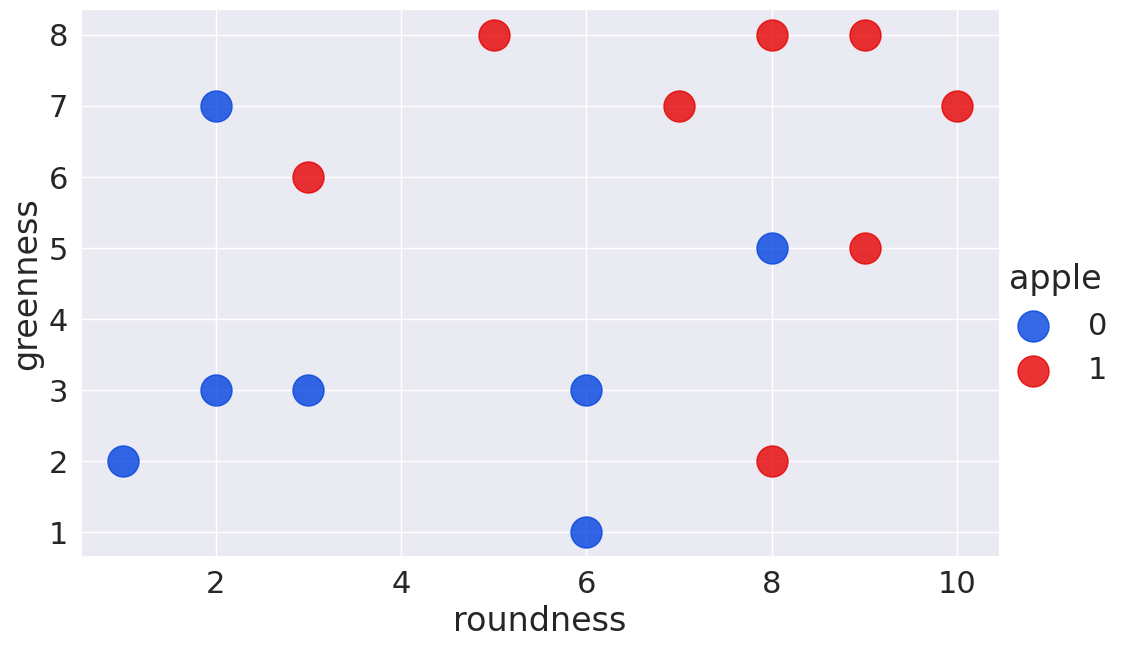

In [10]:
# Scatterplot

sns.set(font_scale = 2)
colors = ["blue", "red", "greyish", "faded green", "dusty purple"]
sns.lmplot(x='roundness',y='greenness',data=dataset,fit_reg=False,hue='apple',palette =sns.xkcd_palette(colors),
           scatter_kws={'s':500}, height=7, aspect=1.5)
#plt.ylim(0, 11)
#plt.xlim(0, 11)


In [11]:
# logistic regression classifier

logreg = linear_model.LogisticRegression(C=1e5) # C= Inverse of regularization strength;
                                                # must be a positive float. Like in support vector machines,
                                                # smaller values specify stronger regularization.
logreg.fit(X, y)

print('coefficients: ',logreg.coef_)
print('intercept:',logreg.intercept_)

coefficients:  [[0.56411613 0.66824472]]
intercept: [-6.33799462]


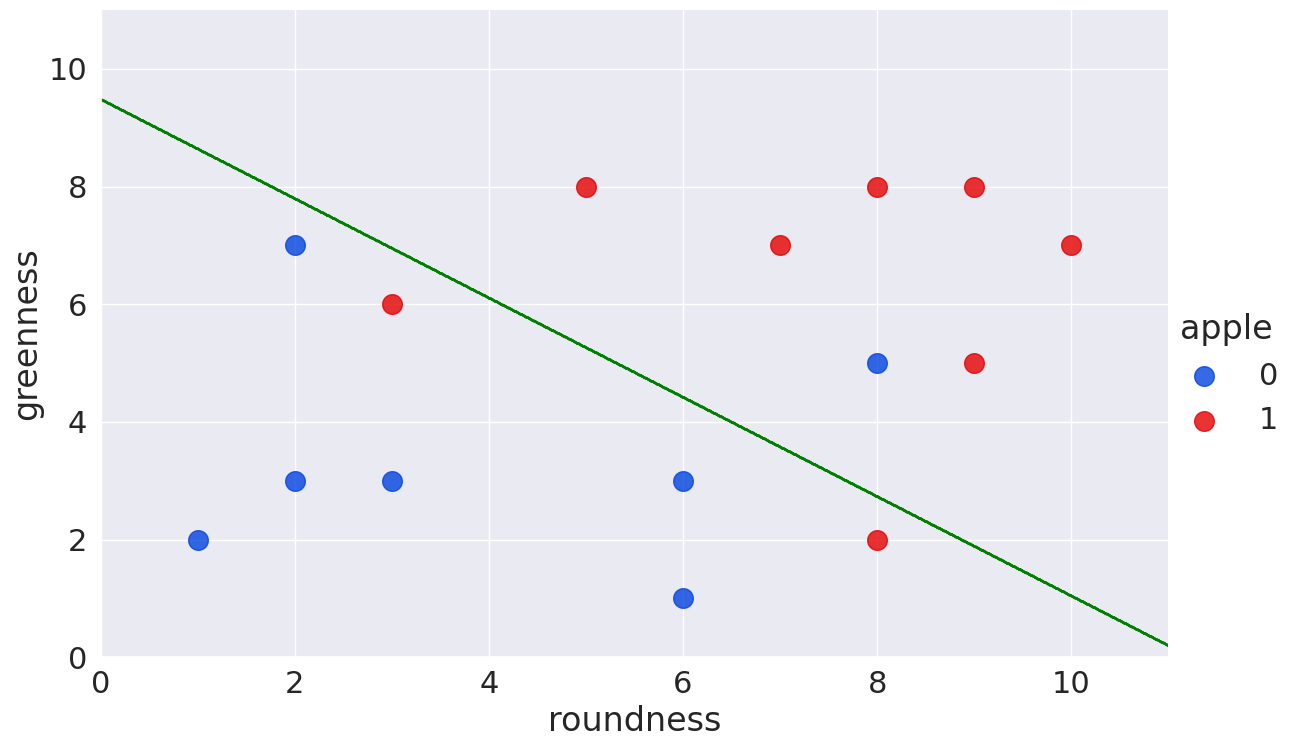

In [12]:
# decision boundary

h = 0.01
rond_min = X[:,0].min()-2
rond_max = X[:,0].max()+2
groen_min = X[:,1].min()-2
groen_max = X[:,1].max()+2
xx, yy = np.meshgrid(np.arange(rond_min, rond_max, h),np.arange(groen_min, groen_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
sns.set(font_scale = 2)
colors = ["blue", "red", "greyish", "faded green", "dusty purple"]
sns.lmplot(x='roundness',y='greenness',data=dataset,fit_reg=False,hue='apple',palette =sns.xkcd_palette(colors),scatter_kws={'s':200}, height=8, aspect=1.5)
plt.ylim(0, 11)
plt.xlim(0, 11)
plt.contour(xx, yy, Z, colors='green')

### Higher order logistic regression classifier

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(357500, 15)


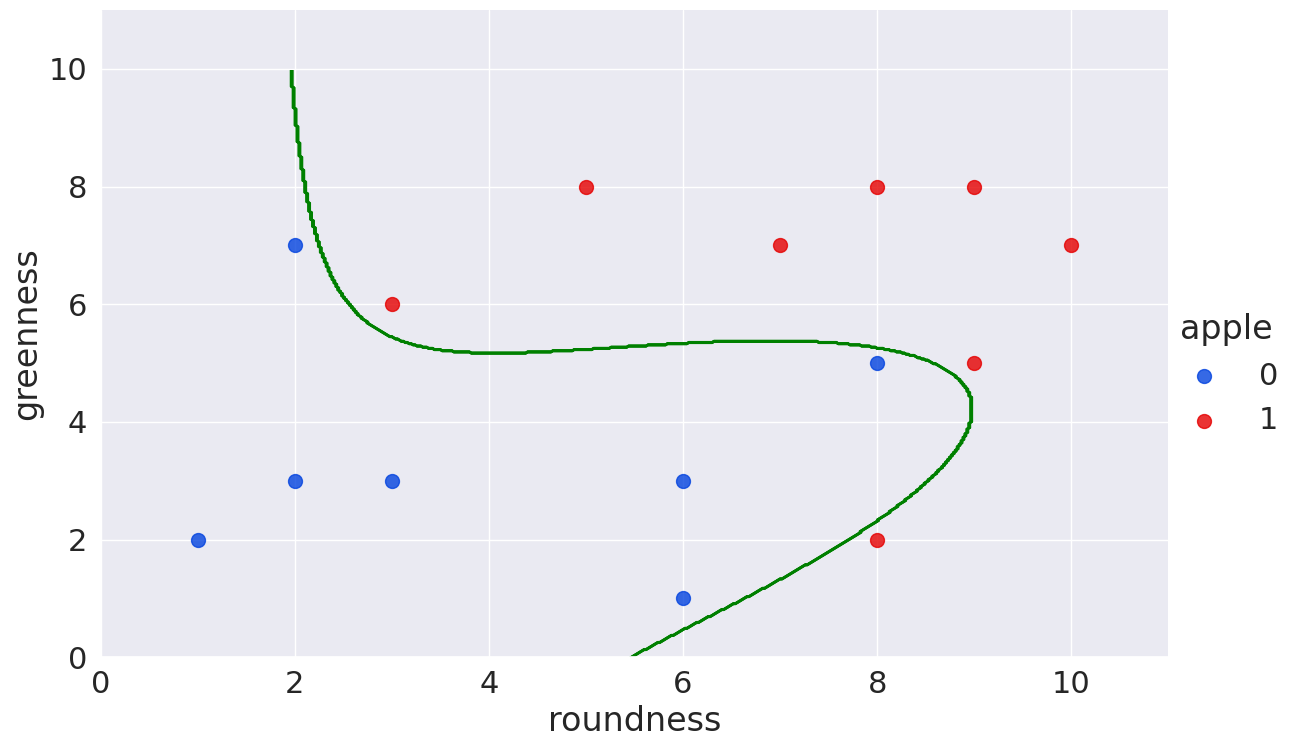

In [13]:
#Higher order features
graad = 4

poly = PolynomialFeatures(graad)
Xp = poly.fit_transform(X)


# Train model

logreg_poly = linear_model.LogisticRegression(C=1)
logreg_poly.fit(Xp, y)

h = 0.02

round_min = X[:,0].min()-2
round_max = X[:,0].max()+2

green_min = X[:,1].min()-2
green_max = X[:,1].max()+2


xx, yy = np.meshgrid(np.arange(round_min, round_max, h),np.arange(green_min, green_max, h))

X_m = np.hstack((xx.reshape(-1,1),yy.reshape(-1,1)))


X_mf = poly.fit_transform(X_m)
print(X_mf.shape)
Z = logreg_poly.predict(X_mf)
Z = Z.reshape(xx.shape)


sns.set(font_scale = 2)
colors = ["blue", "red", "greyish", "faded green", "dusty purple"]
sns.lmplot(x='roundness',y='greenness',data=dataset,fit_reg=False,hue='apple',palette =sns.xkcd_palette(colors),scatter_kws={'s':100}, height=8, aspect=1.5)
plt.ylim(0, 11)
plt.xlim(0, 11)

plt.contour(xx, yy, Z, colors='green')


Deze code voert een hogere-orde logistische regressie uit om complexe, niet-lineaire beslissingsgrenzen te leren. Dit is vooral nuttig als de data niet lineair separabel is. We gaan de code stap voor stap doorlopen:

---

### **1. Creëren van hogere-orde features**

```python
#Higher order features
graad = 4

poly = PolynomialFeatures(graad)
Xp = poly.fit_transform(X)
```

* **graad = 4**: We kiezen een polynomiale graad van 4, wat betekent dat we functies tot de 4e macht gaan toevoegen.
* **PolynomialFeatures(graad)**: Genereert alle mogelijke combinaties van `roundness` en `greenness` tot de 4e macht.
* **fit\_transform(X)**: Transformeert de oorspronkelijke features `X` naar deze hogere-orde representatie.

Voorbeeld van een paar features (`roundness` en `greenness`):

$$
[x, y] \rightarrow [1, x, y, x^2, xy, y^2, x^3, x^2y, xy^2, y^3, ..., x^4, y^4]
$$

**Outputvorm:**
Als je bijvoorbeeld 2 features (`roundness` en `greenness`) hebt en je gebruikt graad 4, krijg je een nieuwe matrix `Xp` met veel meer kolommen, afhankelijk van de gekozen graad. In dit geval zal `Xp` 15 kolommen hebben:

$$
\text{Aantal kolommen} = \frac{(n+d)!}{d! \cdot n!}
$$

waarbij `n` het aantal originele features is en `d` de graad van de polynoom.

---

### **2. Trainen van het logistische regressiemodel**

```python
logreg_poly = linear_model.LogisticRegression(C=1)
logreg_poly.fit(Xp, y)
```

* **C=1**: Regelt de mate van regularisatie. Een lagere waarde zou een gladder beslissingsvlak geven, maar hier is het vrij flexibel.
* **fit(Xp, y)**: Past het model aan de uitgebreide feature-matrix (`Xp`) en de bijbehorende targets (`y`).

---

### **3. Voorbereiden van het meshgrid voor de contourplot**

```python
h = 0.02

round_min = X[:,0].min()-2
round_max = X[:,0].max()+2

green_min = X[:,1].min()-2
green_max = X[:,1].max()+2
```

* **h = 0.02**: Stapgrootte voor het grid, bepaalt de resolutie van de contourplot.
* **round\_min**, **round\_max**: Minimum en maximum waarden voor de `roundness` feature, met een marge van 2 om de randen beter te laten zien.
* **green\_min**, **green\_max**: Zelfde voor de `greenness` feature.

---

### **4. Genereren van een fijnmazig grid van coördinaten**

```python
xx, yy = np.meshgrid(np.arange(round_min, round_max, h),
                     np.arange(green_min, green_max, h))
```

* **np.arange(round\_min, round\_max, h)**: Maakt een 1D-array van waarden tussen `round_min` en `round_max` met stapgrootte `h`.
* **np.meshgrid()**: Maakt een 2D-raster (grid) van deze waarden, zodat we later voor elk punt in dit grid de klasse kunnen voorspellen.

Voorbeeld (klein raster):

$$
xx = \begin{bmatrix}
-2 & -1.98 & -1.96 & \cdots \\
-2 & -1.98 & -1.96 & \cdots \\
\vdots & \vdots & \vdots & \ddots \\
\end{bmatrix}
$$

$$
yy = \begin{bmatrix}
-2 & -2 & -2 & \cdots \\
-1.98 & -1.98 & -1.98 & \cdots \\
\vdots & \vdots & \vdots & \ddots \\
\end{bmatrix}
$$

---

### **5. Voorbereiden van de data voor voorspellingen**

```python
X_m = np.hstack((xx.reshape(-1,1), yy.reshape(-1,1)))
```

* **reshape(-1,1)**: Zet de 2D-matrices `xx` en `yy` om naar kolommen.
* **np.hstack(...)**: Combineert deze kolommen in een `(n, 2)` matrix waarin elke rij een `(roundness, greenness)` paar is.

Voorbeeld:

$$
\text{X\_m} = \begin{bmatrix}
-2 & -2 \\
-1.98 & -2 \\
-1.96 & -2 \\
\vdots & \vdots \\
\end{bmatrix}
$$

---

### **6. Transformeren naar hogere-orde features**

```python
X_mf = poly.fit_transform(X_m)
print(X_mf.shape)
```

* Transformeert elk coördinaatpaar in `X_m` naar dezelfde hogere-orde feature-representatie die we eerder gebruikten voor de trainingsdata (`Xp`).
* **print(X\_mf.shape)**: Laat de dimensies van de uitgebreide features zien, wat iets zoals `(n, 15)` zou kunnen zijn, afhankelijk van de gekozen graad.

---

### **7. Voorspellen van klassen voor elk punt in het raster**

```python
Z = logreg_poly.predict(X_mf)
Z = Z.reshape(xx.shape)
```

* **predict(X\_mf)**: Voorspelt de klasse (`0` of `1`) voor elke rij in `X_mf`.
* **reshape(xx.shape)**: Zet de platte vector `Z` weer om naar de 2D-vorm van `xx` en `yy` voor de contourplot.

---

### **8. Plotten van de resultaten**

```python
sns.set(font_scale = 2)
colors = ["blue", "red", "greyish", "faded green", "dusty purple"]
sns.lmplot(x='roundness',y='greenness',data=dataset,fit_reg=False,hue='apple',palette=sns.xkcd_palette(colors),scatter_kws={'s':100}, height=8, aspect=1.5)
plt.ylim(0, 11)
plt.xlim(0, 11)

plt.contour(xx, yy, Z, colors='green')
```

* **sns.lmplot(...)**: Maakt een scatterplot van de originele data (`roundness` vs `greenness`), gekleurd op basis van de `apple`-klasse.
* **plt.contour(...)**: Tekent de beslissingsgrens (`Z`) over de scatterplot als een groene lijn.
* **plt.xlim() en plt.ylim()**: Stellen de x- en y-limieten in om de contour duidelijk weer te geven.

---

### **9. Resultaat**

Het resultaat is een plot waarin:

* **Groene lijn**: De niet-lineaire beslissingsgrens van het hogere-orde model.
* **Punten**: Geobserveerde data, gekleurd op basis van de `apple`-klasse (`0` of `1`).

---



Maakt hogere-orde feature-interacties (tot graad 4) om niet-lineaire beslissingsgrenzen mogelijk te maken.

